<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°04

## Objetivos del laboratorio

* Reforzar conceptos básicos de reducción de dimensionalidad.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [129]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [130]:
#### cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:

1. Normalizar para las columnas numéricas con procesamiento **StandardScaler**.

In [131]:
scaler = StandardScaler()
x=scaler.fit_transform(df.drop(['id','diagnosis'],axis=1))
y=df.loc[:,['id','diagnosis']]


2. Realice un gráfico de correlación. Identifique la existencia de colinealidad.

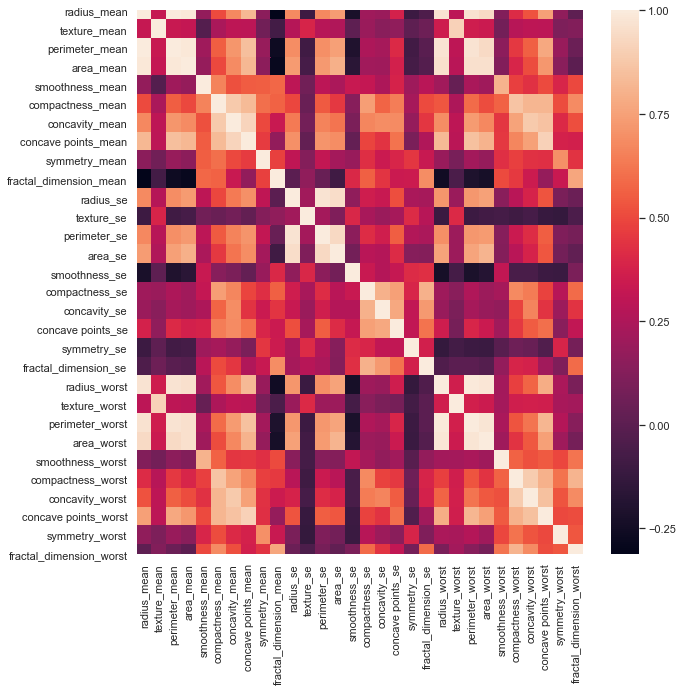

In [132]:
fig, ax = plt.subplots(figsize=(10, 10))
df_corre=df.drop(['id','diagnosis'],axis=1).corr()
sns.heatmap(df_corre)

3. Realizar un ajuste PCA con **n_components = 10**. Realice un gráfico de la varianza y varianza acumulada. Interprete.

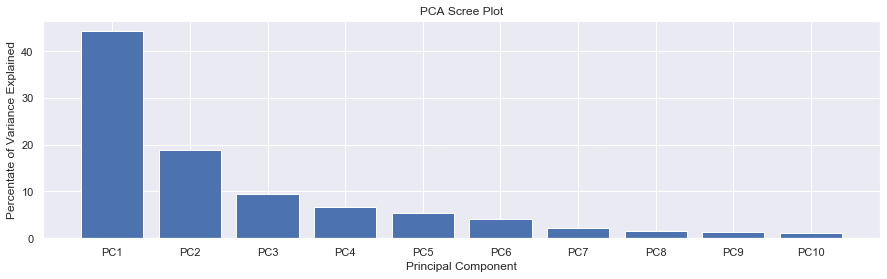

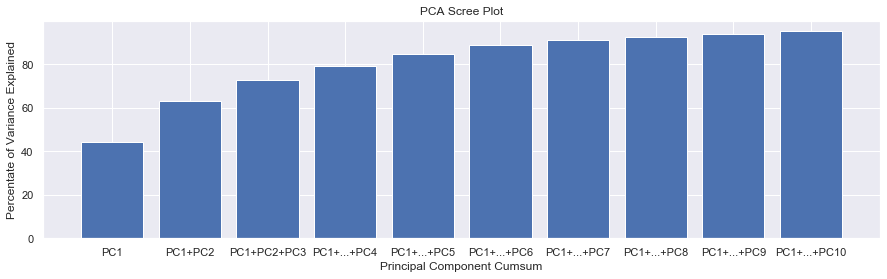

In [133]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3', 'PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9', 'PC10'])
targetDataframe = df[['diagnosis']]
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2','PC3', 'PC4', 'PC5', 'PC6','PC7', 'PC8', 'PC9', 'PC10']

plt.figure(figsize=(15,4))
plt.bar(x= range(1,11), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC1+PC2', 'PC1+PC2+PC3', 'PC1+...+PC4', 'PC1+...+PC5', 'PC1+...+PC6', 'PC1+...+PC7', 'PC1+...+PC8', 'PC1+...+PC9', 'PC1+...+PC10']

plt.figure(figsize=(15,4))
plt.bar(x= range(1,11), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()
plt.show()

4. Devuelva un dataframe con las componentes principales.

In [134]:
newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)
newDataframe.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,diagnosis
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411425,2.159370,-0.398404,-0.157133,-0.877423,1
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240985,-0.711900,1.107003,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097385,0.024035,0.454224,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429912,1.059579,-1.405479,-1.117042,1
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636371,-0.263790,0.377730,1


5. Aplique al menos tres modelos de clasificación. Para cada modelo, calule el valor de sus métricas.

In [135]:
# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(principalDataframe, targetDataframe, test_size=0.2, random_state = 42) 
Y_test['diagnosis']

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64

In [136]:
from sklearn.linear_model import LogisticRegression
rlog = LogisticRegression()
rlog.fit(X_train, Y_train) # ajustando el modelo

C:\Users\Hugo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [141]:
# metrics

from metrics_classification import *
from sklearn.metrics import confusion_matrix

y_true1 =  list(Y_test['diagnosis'])
y_pred1 = list(rlog.predict(X_test))


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true1,y_pred1))

df_temp = pd.DataFrame(
    {
        'y':y_true1,
        'yhat':y_pred1
        }
)

df_metrics = summary_metrics(df_temp)
print("")
print(df_metrics)


Matriz de confusion:
 
[[70  1]
 [ 1 42]]

   accuracy  recall  precision  fscore
0    0.9825  0.9813     0.9813  0.9813


In [138]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, Y_train)

C:\Users\Hugo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [142]:
from metrics_classification import *
from sklearn.metrics import confusion_matrix

y_true2 =  list(Y_test['diagnosis'])
y_pred2= list(clf.predict(X_test))


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true2,y_pred2))

df_temp = pd.DataFrame(
    {
        'y':y_true2,
        'yhat':y_pred2
        }
)

df_metrics = summary_metrics(df_temp)
print("")
print(df_metrics)


Matriz de confusion:
 
[[70  1]
 [ 2 41]]

   accuracy  recall  precision  fscore
0    0.9737  0.9697     0.9742  0.9719


In [144]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(max_depth=2, random_state=42)
clf1.fit(X_train, Y_train)

C:\Users\Hugo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=2, random_state=42)

In [145]:
from metrics_classification import *
from sklearn.metrics import confusion_matrix

y_true3 =  list(Y_test['diagnosis'])
y_pred3= list(clf1.predict(X_test))


print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true3,y_pred3))

df_temp = pd.DataFrame(
    {
        'y':y_true3,
        'yhat':y_pred3
        }
)

df_metrics = summary_metrics(df_temp)
print("")
print(df_metrics)


Matriz de confusion:
 
[[70  1]
 [ 7 36]]

   accuracy  recall  precision  fscore
0    0.9298  0.9116      0.941   0.923
